<a href="https://colab.research.google.com/github/Bluelord/Intro_to_ML_Python_Notes/blob/master/Supervised_Learning/k_Nearest_Neighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install mglearn

### **k-Nearest Neighbors**
---

This model consists of sorting the training data to predict the new data point from the closest data point in the traing dataset (nearest neighbours).


#### **k-Neighbors classification**

In this we consider **k** number of nearest neighbours and uses voting to assign the class for the test data, which means majority class among the k-nearest neighbours will be assigned label to the test data.

Following exampl shows the use of three cloest neighbours.
.


In [1]:
# Imorting Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Creating Simulated Dataset
X, y = make_classification(n_samples = 100, n_features = 3, n_informative = 3,
                                        n_redundant = 0, n_classes = 2, weights = [0.3,0.7], random_state = 1)
# Spliting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
# Building & fitting KNN classification modwl to trainig set with k = 3
KNNc  = KNeighborsClassifier(n_neighbors = 3)
KNNc.fit(X_train, y_train)
# Pridicting  the labels
print("Test set predictions: {}" 
      .format(KNNc.predict(X_test)))
# Accuracy for the prediction
print("Test set accuracy: {: .2f}" 
      .format(KNNc.score(X_test, y_test)))

Test set predictions: [0 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1 1 1]
Test set accuracy:  0.92


**Analyzing K-Neighbour Classifier**

Considering more and more neighbours corresponds to a simpler model. Considering the extreme cases where number of **k** is same as data points in training set, then each test point will have same as the class in training set (underfitting / high bias). Below figure gives an idea that smoother bounder corresponds to a simpler model.
![](https://github.com/Bluelord/Intro_to_ML_Python_Notes/blob/9d20722ef75b0ba251f4af3a4392643b4a7b750d/Images/nearest%20neighbors%20model%20for%20different%20values.JPG)


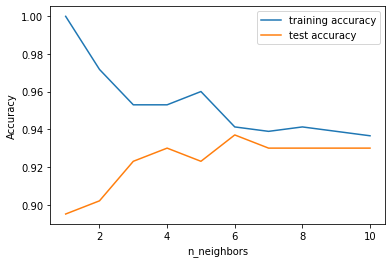

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from  sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state=70)

training_accuracy = []
test_accuracy = []
neighbors_setting = range(1,11)
for n_neighbors in neighbors_setting:
  KNNc = KNeighborsClassifier(n_neighbors = n_neighbors)
  KNNc.fit(X_train, y_train)

  training_accuracy.append(KNNc.score(X_train, y_train))
  test_accuracy.append(KNNc.score(X_test, y_test))

plt.plot(neighbors_setting, training_accuracy, label = "training accuracy")
plt.plot(neighbors_setting, test_accuracy, label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

The plot shows that at low **k** value model overfits the training set and has low testing accuracy. As we increase **k** value our model become simpler and the testing accuracy increases. But at very high **k** value our model become too simple and it perform the worse, we will fund the best performance in the middle of the range.



---


#### **k-neighbours regression**

In the with k neighbours, multiple nearest values are found for the test data from the training, the mean of this values are considered to be the prediction for the test data point.


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

**Analyzing K-Nebhours Regressor**

Here from the figure we can observe that when k value is low our prediction of test is low and it overfits on training data. As we increase k value to very high it leads to smoother prediction, but these do not fit the training data as well. Thus the k value should we in between so that it fits both training and test data.

#### **Strengths, weaknesses and parameters**

* In practic, there are two impotant parameters to KNeighbours Classifiers, one is **k value** and other is how we measure the distanse between data points (By default, Euclidean distance is used and there are many other measure can be used).

* One of the strength of KNN is that the it is very easy to understand and also gives reasonable performance without a lot of tuning of the parameters. * When our dataset is very large (either large number of features or sampels numbers) prediction is slow. This model also perform badly when we have sparse datasets (0 most of the time).